In [10]:
%load_ext autoreload
%autoreload 2
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))
from line_extraction_primitives.cell import Cell
from line_extraction_primitives.line import Line, load_lines, save_lines
from line_extraction_primitives.grid import Grid
import line_extraction_primitives.extraction_helper_methods as ehm
from footprint_extraction import extract_lines
import plotting
import matplotlib.pyplot as plt
import numpy as np
import math
from skimage import exposure
import argparse

#Setup for the directories and filenames
output_dir = "../data/"
point_cloud_file = output_dir + "points.txt"
density_filename = "density.txt"

if not os.path.exists(output_dir):
    os.mkdir(output_dir)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
#Sets the minimum wall height and length that will be extracted
minimum_wall_height = 2.0
minimum_wall_length = 2.0

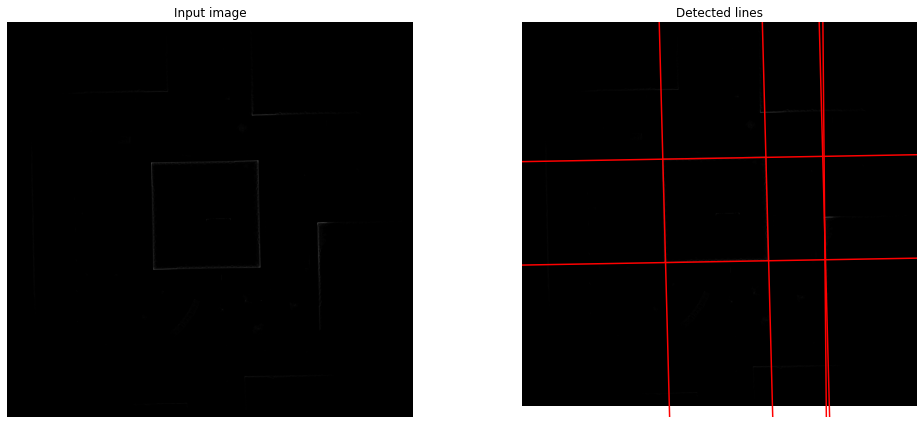

/home/mwudunn/Documents/a3dbr/line_extraction_primitives/grid.py:422: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return filtered_lines, np.array(filtered_points)


Density is: 1225.3745053729729


In [12]:
display_grid, points, offset = extract_lines.construct_grid(point_cloud_file)
density = extract_lines.compute_line_density(points, minimum_wall_height, minimum_wall_length)
with open(output_dir + density_filename, 'w') as f:
    f.write(str(density))
    
np.savetxt(output_dir + 'polygon_offset.txt', offset.reshape((1,3)), delimiter=',')
print("Density is: " + str(density))

Iteration: 0


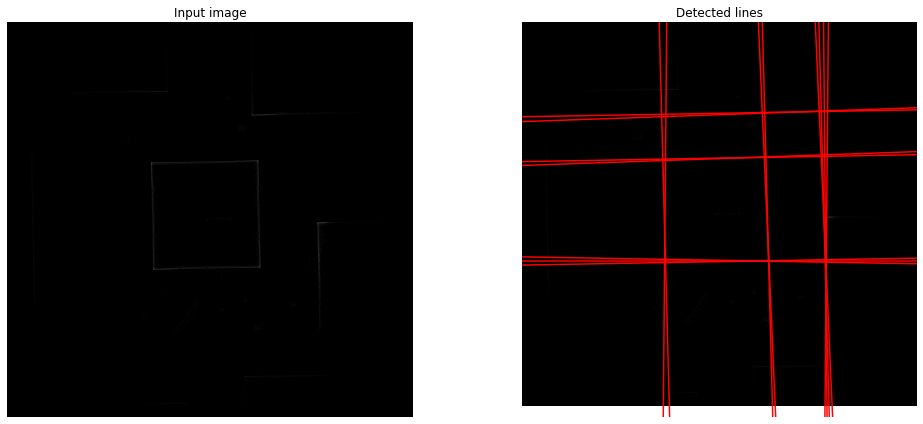

/home/mwudunn/Documents/a3dbr/line_extraction_primitives/grid.py:422: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return filtered_lines, np.array(filtered_points)


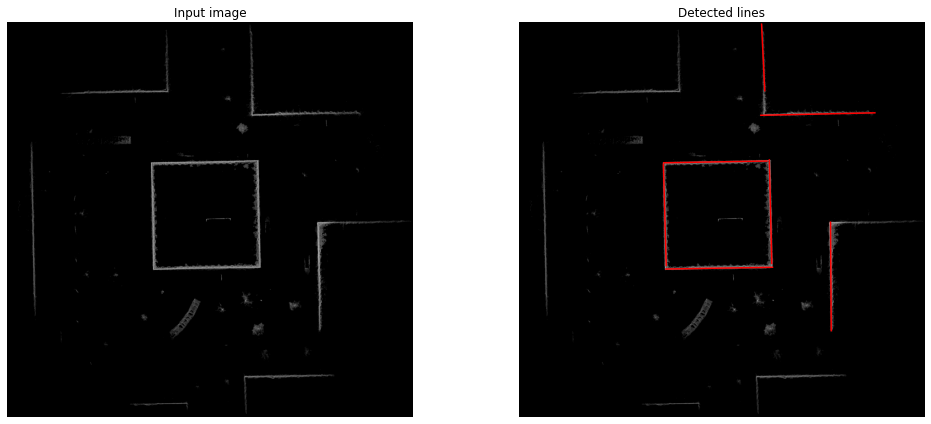

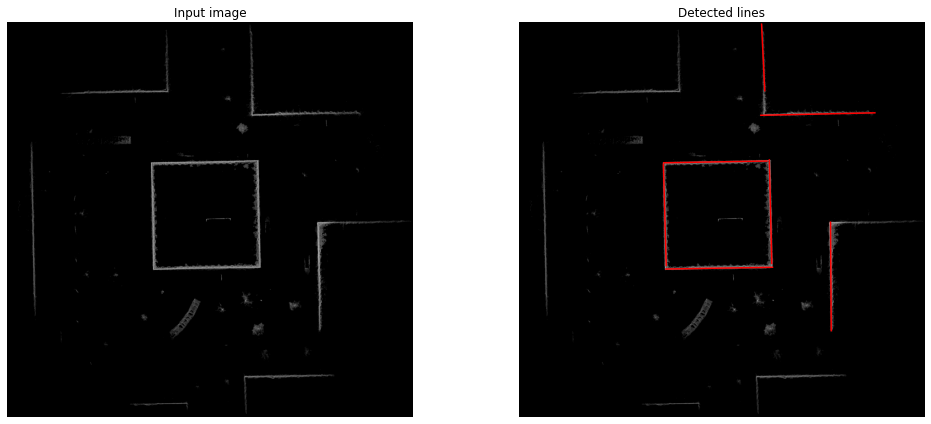

7
Iteration: 1


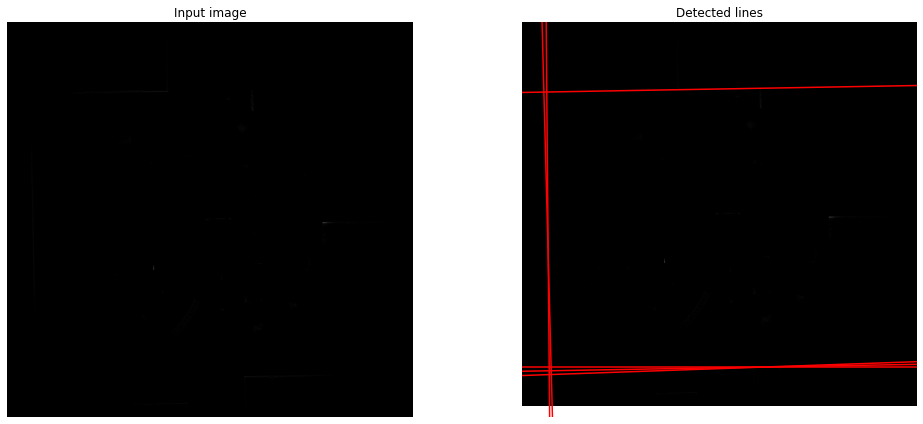

/home/mwudunn/Documents/a3dbr/line_extraction_primitives/grid.py:422: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return filtered_lines, np.array(filtered_points)


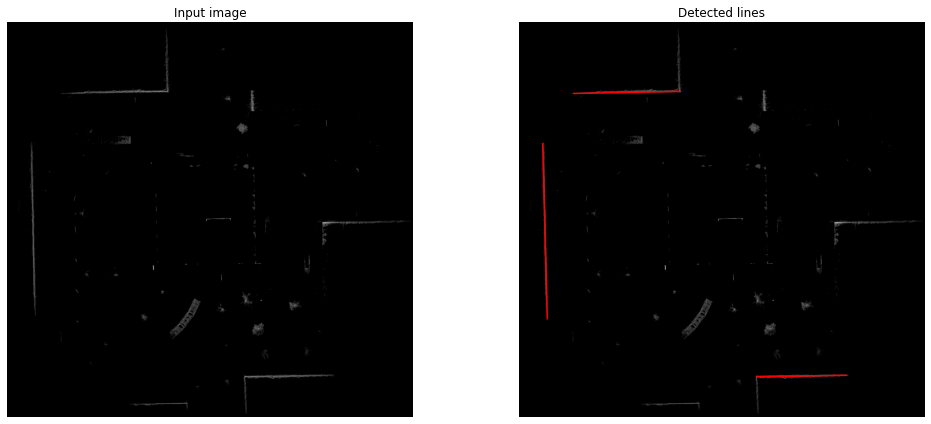

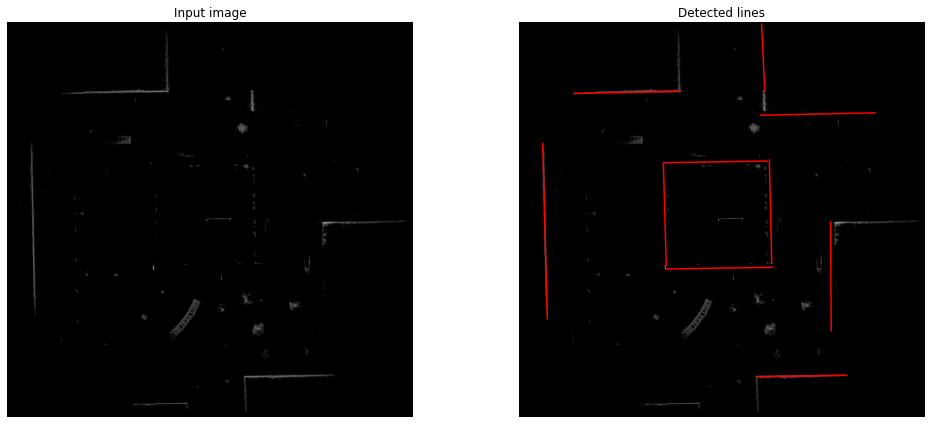

3
Iteration: 2


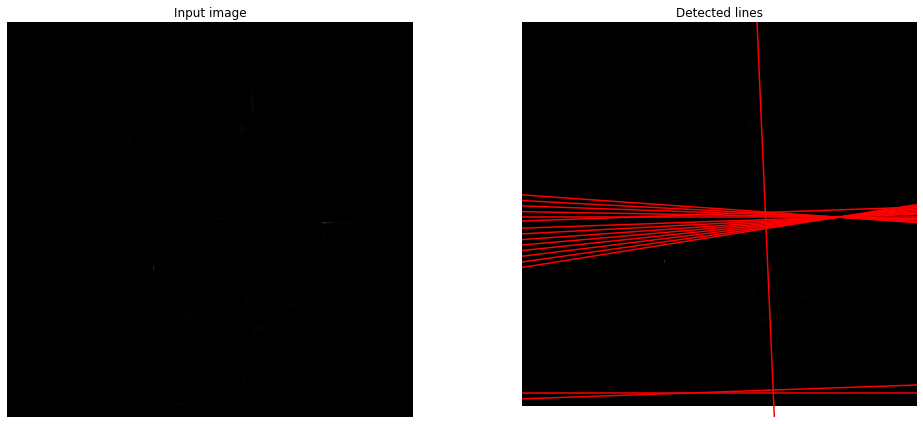

/home/mwudunn/Documents/a3dbr/line_extraction_primitives/grid.py:422: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return filtered_lines, np.array(filtered_points)


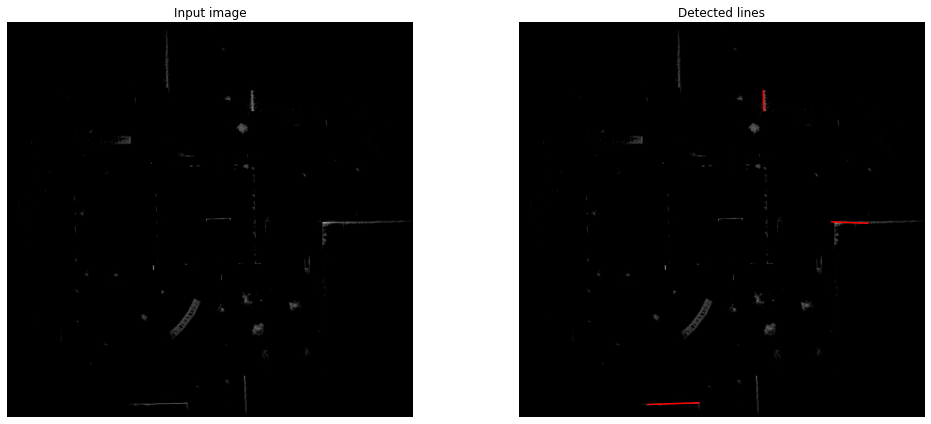

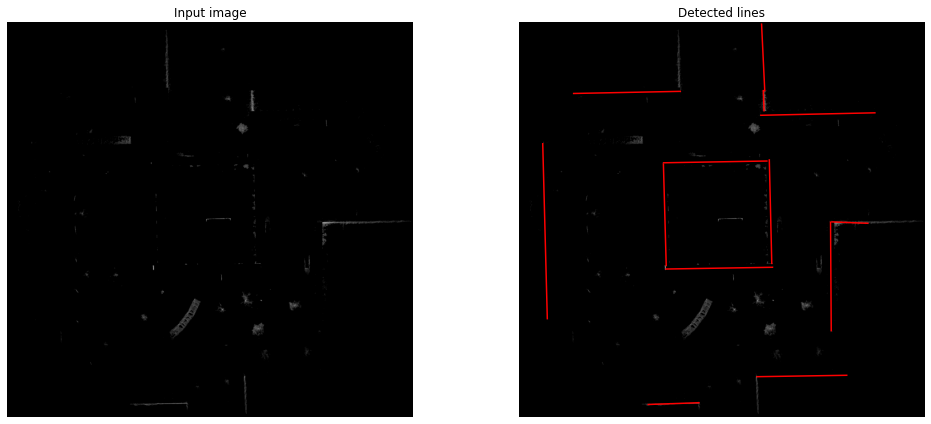

3
Iteration: 3


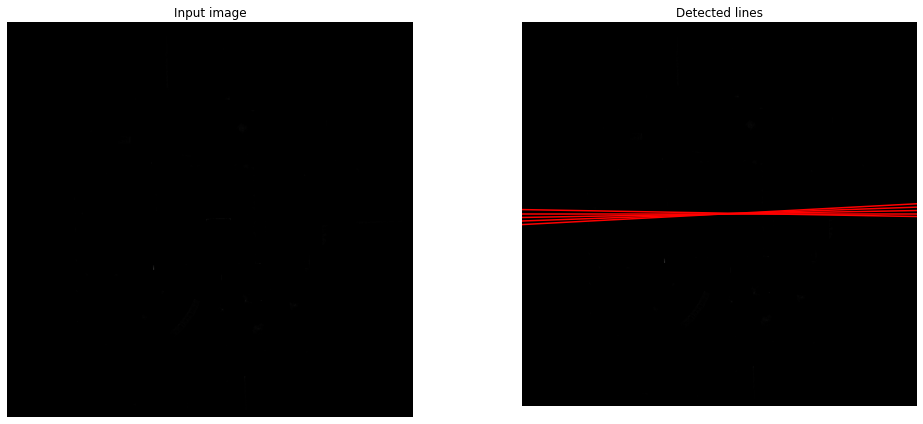

/home/mwudunn/Documents/a3dbr/line_extraction_primitives/grid.py:422: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return filtered_lines, np.array(filtered_points)


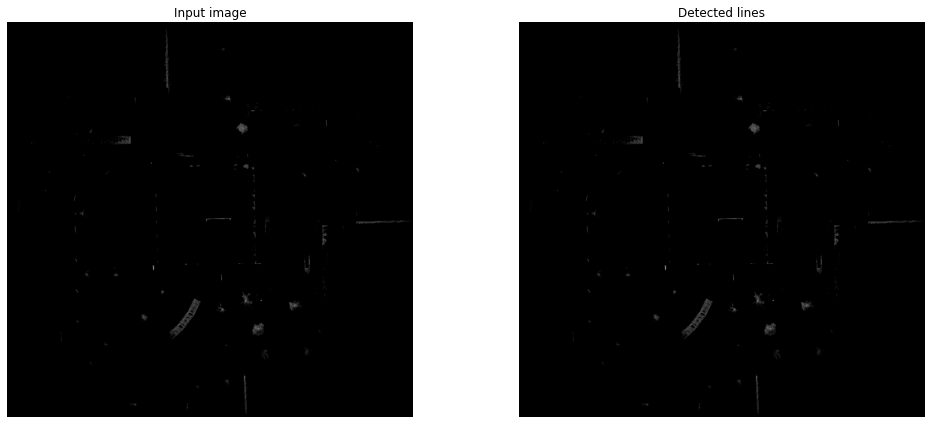

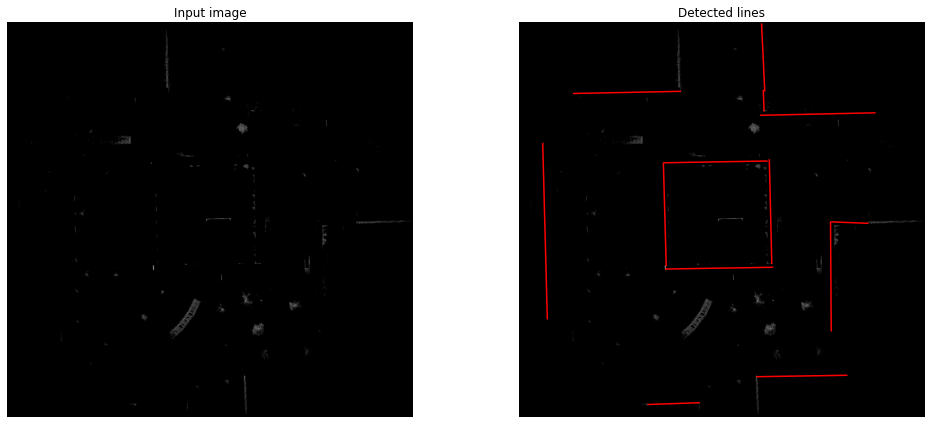

0
Iteration: 4


In [13]:
grid, all_segs, line_seg_points, remaining_points = extract_lines.iterative_line_detection(points, density, minimum_wall_height, minimum_wall_length, iterations=20, verbose=True)    

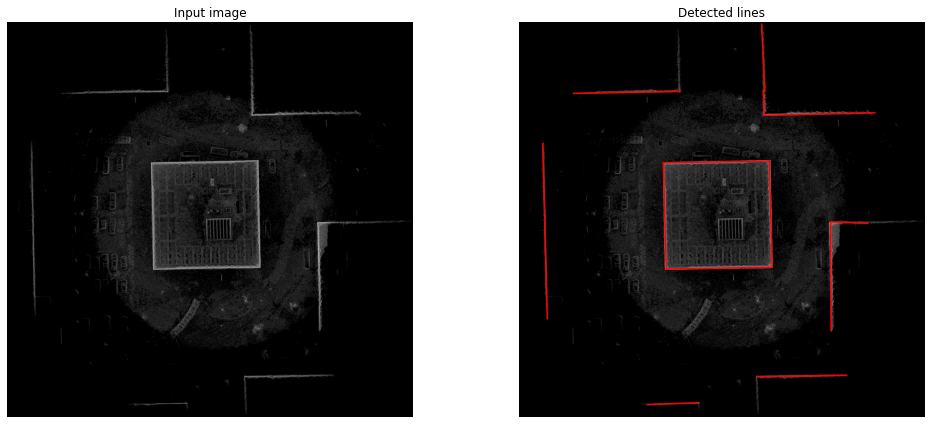

In [14]:
im = display_grid.get_thresholded_counts()
new_segs = extract_lines.post_process_segments(all_segs)
new_segs = extract_lines.delete_duplicate_segments(new_segs)
new_segs = extract_lines.delete_overlapping_segments(new_segs)
plotting.plot_line_segments_on_grid(display_grid, new_segs)
save_lines(new_segs, output_dir + "alameda_line_segments.txt")